In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import load_diabetes

In [24]:
df=load_diabetes()

In [25]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [26]:
x=df.data

In [27]:
y=df.target

In [28]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [30]:
L.fit(X_train,y_train)

LinearRegression()

In [31]:
print(L.coef_)
print(L.intercept_)

[  23.45388514 -247.43107084  492.10188174  329.36498638 -970.79784704
  573.54460121  182.41386124  255.9162021   794.21654496   89.32074078]
152.13619339070766


In [33]:
y_pred=L.predict(X_test)

In [34]:
L.score(X_test,y_test)

0.5188118914964637

In [35]:
L.score(X_train,y_train)

0.5159868419842792

In [12]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188118914964637
RMSE 48.72710829141399


# Ridge

In [13]:
from sklearn.linear_model import Ridge

In [14]:
R=Ridge(alpha=1000)

In [15]:
R.fit(X_train,y_train)

Ridge(alpha=1000)

In [16]:
print(R.coef_)
print(R.intercept_)

[ 0.25917884  0.05634256  0.77491396  0.60827155  0.23265473  0.18351618
 -0.51255842  0.52541202  0.73278302  0.52702311]
151.83466638044493


In [17]:
y_pred1=R.predict(X_test)

In [18]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.0022195533951115953
RMSE 70.16664159944268


In [19]:
mean_squared_error(y_test,y_pred1)

4923.35759334464

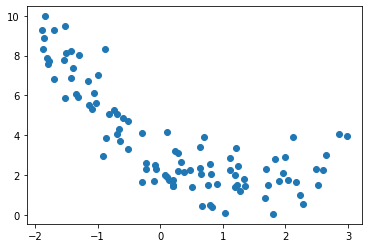

In [20]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

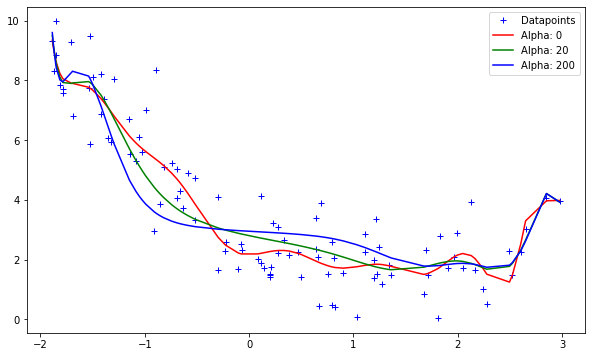

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()